#UFO DATA EXPLORATION

In [1]:
from datetime import timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%%time
#raw_data = pd.read_csv('./data/complete.csv')
scrubbed_data = pd.read_csv('../raw_data/scrubbed.csv', low_memory=False)

CPU times: user 218 ms, sys: 37.1 ms, total: 255 ms
Wall time: 272 ms


In [3]:
scrubbed_data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [4]:
import seaborn as sns
plt.style.use('dark_background')
plt.rcParams['font.size'] = 14
plt.figure(figsize=(12,5))
palette = sns.color_palette('Paired', 10)

<Figure size 864x360 with 0 Axes>

In [5]:
scrubbed_data['country'].describe()

count     70662
unique        5
top          us
freq      65114
Name: country, dtype: object

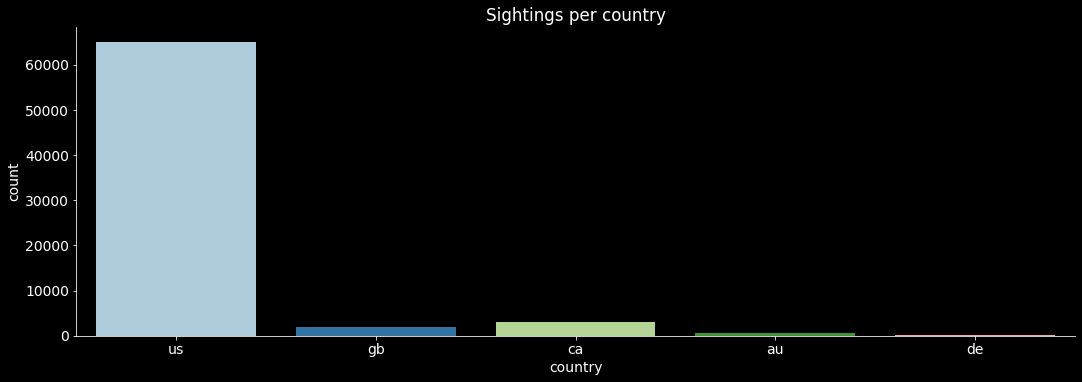

In [6]:
sns.catplot(x="country", kind="count", palette=palette, data=scrubbed_data, height=5, aspect=3);
sns.despine()
plt.title('Sightings per country');
plt.show()

In [7]:
def extract_time_features(df):
    timezone_name = 'America/New_York'
    time_column = "datetime"
    df['datetime_zero'] = df[time_column].str.replace('24:00', '0:00')
    df['datetime_er'] = pd.to_datetime(df['datetime_zero'], format='%m/%d/%Y %H:%M')
    selrow = df['datetime'].str.contains('24:00')
    df[time_column] = df['datetime_er'] + selrow * timedelta(days=1)
    df.index = pd.to_datetime(df[time_column])
    df["dow"] = df.index.weekday
    df["hour"] = df.index.hour
    df["month"] = df.index.month
    df["year"] = df.index.year
    return df.reset_index(drop=True)

In [8]:
time_df = extract_time_features(scrubbed_data)

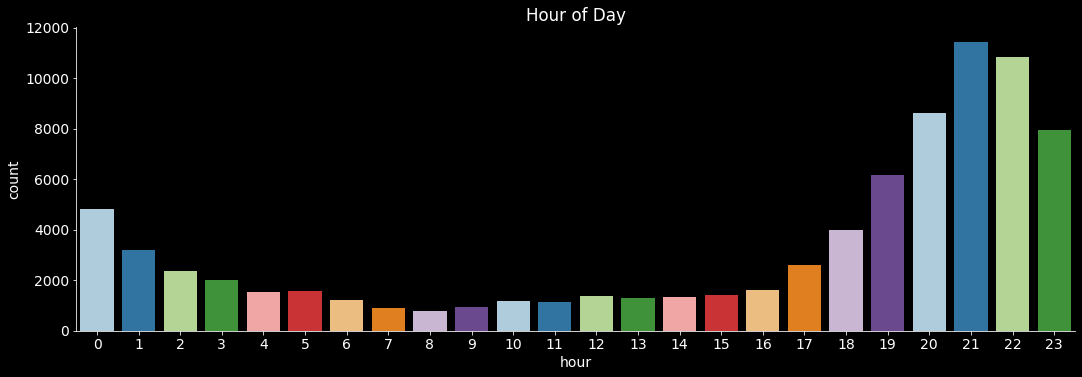

In [9]:
sns.catplot(x="hour", kind="count", palette=palette, data=time_df, height=5, aspect=3);
sns.despine()
plt.title('Hour of Day');
plt.show()

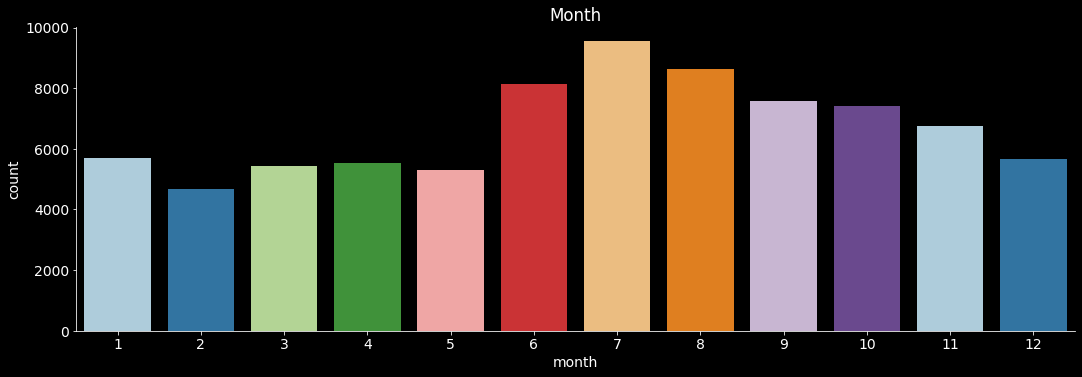

In [10]:
sns.catplot(x="month", kind="count", palette=palette, data=time_df, height=5, aspect=3);
sns.despine()
plt.title('Month');
plt.show()

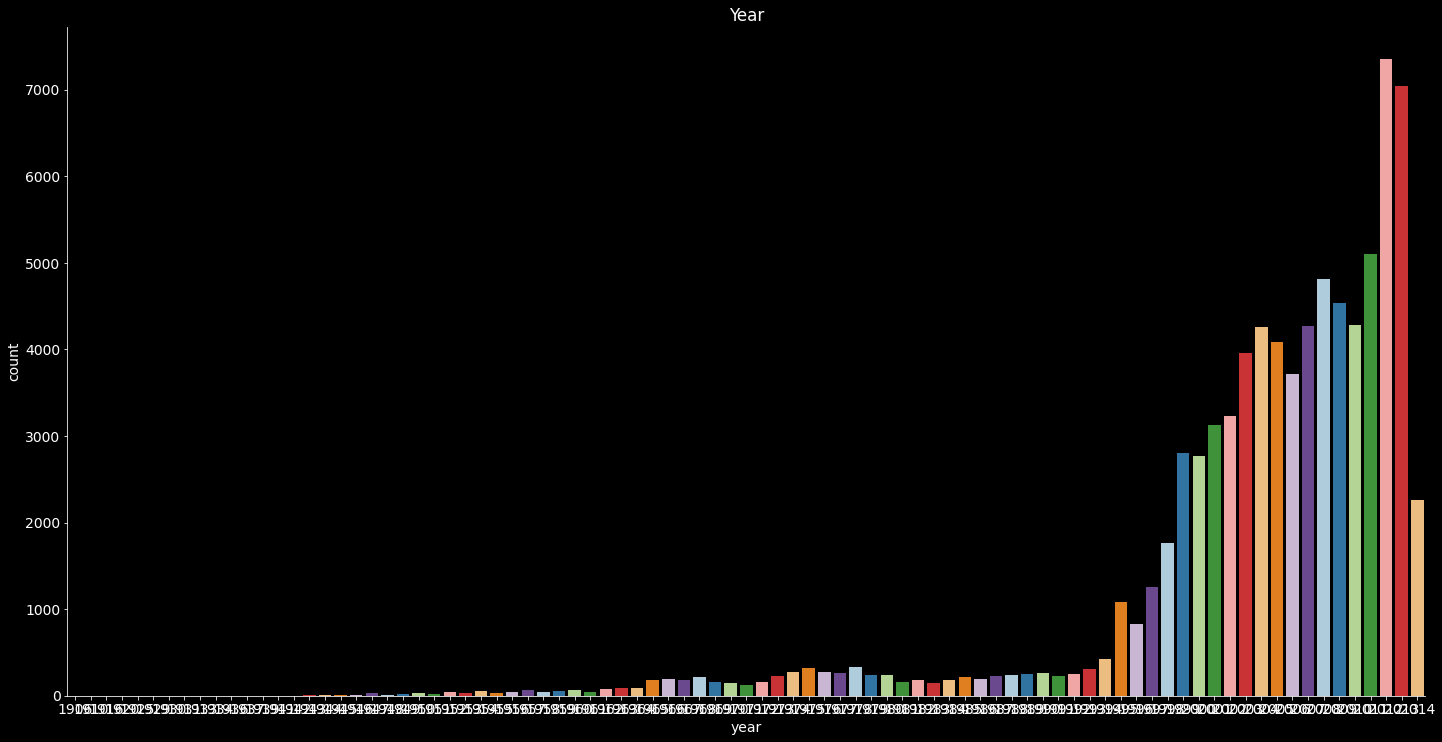

In [11]:
sns.catplot(x="year", kind="count", palette=palette, data=time_df, height=10, aspect=2);
sns.despine()
plt.title('Year');
plt.show()

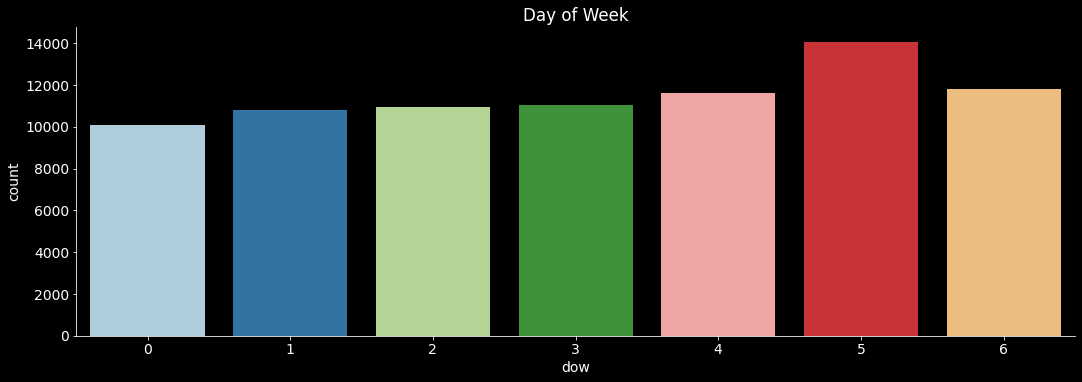

In [12]:
sns.catplot(x="dow", kind="count", palette=palette, data=time_df, height=5, aspect=3);
sns.despine()
plt.title('Day of Week');
plt.show()

In [13]:
!pip install folium
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [14]:
center_location = 29.8830556, -97.9411111
m = folium.Map(location=center_location, control_scale=True, zoom_start=3)

In [15]:
location_df = scrubbed_data[['latitude',
                             'longitude ']]

In [16]:
location_df['count'] = 1
heatmap_data = location_df.head(10000).groupby(['latitude', 'longitude ']).sum().reset_index().values.tolist()
gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}
HeatMap(data=heatmap_data, radius=5, gradient=gradient, max_zoom=13).add_to(m)
m

<ipython-input-16-79c7aafa0fac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['count'] = 1


In [17]:
time_df['count'] = 1
heatmap_data_by_hour = []
__df__ = time_df.head(10000)
for hour in time_df.hour.sort_values().unique():
    _df = __df__[__df__.hour == hour][['longitude ', 'latitude', 'count']].groupby(['latitude', 'longitude ']).sum().reset_index().values.tolist()
    heatmap_data_by_hour.append(_df)

In [18]:
m2 = folium.Map(location=center_location, control_scale=True, zoom_start=11)
HeatMapWithTime(heatmap_data_by_hour, radius=5, 
                gradient=gradient, 
                min_opacity=0.5, max_opacity=0.8, 
                use_local_extrema=False).add_to(m2)
m2

In [19]:
new_data = pd.read_csv('../raw_data/ufo.csv')

In [20]:
new_data.head()

,Datetime,City,State,Shape,Duration,Summary,Posted
0,4/23/21 06:30,Blackshear,GA,Circle,9 minutes,Very strange ((NUFORC Note: Rocket launch f...,4/23/21
1,4/23/21 06:00,Mechanicsville,VA,Circle,Seconds,Ball in the sky ((NUFORC Note: Rocket launc...,4/23/21
2,4/23/21 06:00,Vero Beach,FL,Light,5 minutes,I was driving and saw something strange in the...,4/23/21
3,4/23/21 05:59,St. Augustine,FL,Light,3 minutes,2 extremely bright lights appeared over east c...,4/23/21
4,4/23/21 05:58,Durham,NC,Cone,>5 minutes,A cone of light coming from the sky unlike any...,4/23/21


In [21]:
new_data.isnull().sum().sort_values(ascending=False)
len(new_data)

97250

In [22]:
len(new_data)
new_data = new_data.drop_duplicates()
len(new_data)

97154

In [23]:
new_data = new_data.dropna()
len(new_data)

86220

In [24]:
new_data['Datetime'] = pd.to_datetime(new_data['Datetime'], errors='coerce')
new_data.dtypes

Datetime    datetime64[ns]
City                object
State               object
Shape               object
Duration            object
Summary             object
Posted              object
dtype: object

In [25]:
latest = scrubbed_data['datetime'].max()
latest

Timestamp('2014-05-08 18:45:00')

In [26]:
new_data = new_data[new_data['Datetime'] > latest]
len(new_data)

38272

In [27]:
new_data.min()

Datetime                                  2014-05-08 19:20:00
City                      ((Location no revealed by witness))
State                                                      AB
Shape                                                Changing
Duration                                           15 minutes
Summary     \t\tI looked out my back door that faces N, I ...
Posted                                                1/10/09
dtype: object

In [29]:
#!pip install geopy
import time
from geopy.geocoders import Nominatim

def geocode(city, state):
    time.sleep(1)
    try:
        print(city, state)
        geolocator = Nominatim(user_agent="alien_finder")
        geocode = geolocator.geocode(f"{city}, {state}")
        print(geocode.latitude, geocode.longitude)
        return(geocode.latitude, geocode.longitude)
    except:
        return(None, None)
    
new_data['latitude'][:2], new_data['longitude'][:2] = new_data[:2].apply(lambda x: geocode(x['City'], x['State']), axis=1)
new_data.head(50)

Blackshear GA
31.3060513 -82.2420661
Mechanicsville VA
41.9044574 -91.2546067


ValueError: Length of values (2) does not match length of index (38272)

In [35]:
import csv
with open('../raw_data/military-bases.csv', 'rt') as f:
    reader = csv.DictReader(f)
    for row in reader:
        print(row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'Geo Point;Geo Shape;OBJECTID_1;OBJECTID;COMPONENT;Site Name;Joint Base;State Terr;COUNTRY;Oper Stat;PERIMETER;AREA;Shape_Leng;Shape_Area': '24.5749669839', None: ['-81.69039869;"{""type"": ""MultiPolygon""', ' ""coordinates"": [[[[-81.66718435213436', ' 24.59214050789613]', ' [-81.66537608119667', ' 24.59298853998792]', ' [-81.66524899204187', ' 24.592859731291565]', ' [-81.66530027147154', ' 24.592878778068858]', ' [-81.66534532467799', ' 24.592864840546174]', ' [-81.66541131042717', ' 24.59283430753959]', ' [-81.66543235885258', ' 24.5928286787815]', ' [-81.66546238683759', ' 24.592814760040255]', ' [-81.66549240224619', ' 24.59279817353825]', ' [-81.66554643501222', ' 24.592775894560976]', ' [-81.66562157100088', ' 24.592748038278184]', ' [-81.6656545436634', ' 24.592728619824182]', ' [-81.6656603800178', ' 24.59269835470412]', ' [-81.66565132499974', ' 24.59268188989412]', ' [-81.66564506284391', ' 24.592632301045928]', ' [-81.66564474304364', ' 24.59257182221209]', ' [-81.665656

In [31]:
military_data